<a href="https://colab.research.google.com/github/dunliangyang2010/Deep-Learning-practice/blob/master/CNN_models_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.utils import plot_model

In [3]:
# test data
import numpy as np
# (batch size, img H, img W, channels)
x = np.random.randint(0, 255, size=(1, 100, 100, 3)).astype(float) # model吃小數
output1 = Conv2D(16, 3, padding='same', strides=2)(x)
output2 = MaxPooling2D(3)(output1)

output1.shape, output2.shape

(TensorShape([1, 50, 50, 16]), TensorShape([1, 16, 16, 16]))

In [ ]:
# Clear sesssion (Graph)
tf.keras.backend.clear_session()

In [4]:
# AlexNet
model = Sequential([
    Conv2D(96, (11,11), strides=(4,4), input_shape=(224,224,3), activation='relu'),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(256, (5,5), strides=(1,1), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(384, (3,3), strides=(1,1), padding='same',activation='relu'),
    Conv2D(384, (3,3), strides=(1,1), padding='same',activation='relu'),
    Conv2D(256, (3,3), strides=(1,1), padding='same',activation='relu'),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(1000, activation='softmax'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 96)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 256)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 384)       885120    
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 384)       1

In [ ]:
# VGG16
model = Sequential([
    Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(224,224,3)),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128, (3,2), padding='same', activation='relu'),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(256, (3,3), padding='same', activation='relu'),
    Conv2D(256, (3,3), padding='same', activation='relu'),
    Conv2D(256, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(512, (3,3), padding='same', activation='relu'),
    Conv2D(512, (3,3), padding='same', activation='relu'),
    Conv2D(512, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(512, (3,3), padding='same', activation='relu'),
    Conv2D(512, (3,3), padding='same', activation='relu'),
    Conv2D(512, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    # GlobalAveragePooling2D(),
    Dense(4096,activation='relu'),
    Dropout(0.5),
    Dense(4096,activation='relu'),
    Dropout(0.5),
    Dense(1000,activation='softmax'),
])
model.summary()

In [5]:
# GoogLeNet / InceptionV1
 
def inception(x, nb_filter):
    branch1x1 = Conv2D(nb_filter, (1,1), padding='same', activation='relu')(x)
 
    branch3x3 = Conv2D(nb_filter, (1,1), padding='same', activation='relu')(x)
    branch3x3 = Conv2D(nb_filter, (3,3), padding='same', activation='relu')(branch3x3)
 
    branch5x5 = Conv2D(nb_filter, (1,1), padding='same', activation='relu')(x)
    branch5x5 = Conv2D(nb_filter, (5,5), padding='same', activation='relu')(branch5x5)
 
    branchpool = MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='same')(x)
    branchpool = Conv2D(nb_filter, (1,1), padding='same', activation='relu')(branchpool)
 
    x = concatenate([branch1x1, branch3x3, branch5x5, branchpool], axis=-1)
 
    return x
 
inputs = Input(shape=(224, 224, 3))
x = Conv2D(64, (7,7), padding='same', strides=(2,2), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(x)
x = Conv2D(192, (3,3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(x)
x = inception(x,64)
x = inception(x,120)
x = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(x)
x = inception(x,128)
x = inception(x,128)
x = inception(x,128)
x = inception(x,132)
x = inception(x,208)
x = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(x)
x = inception(x,208)
x = inception(x,256)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
x = Dense(1000, activation='relu')(x)
x = Dense(1000, activation='softmax')(x)
model = Model(inputs, x)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_7 (Conv2D)              (None, 112, 112, 64  9472        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_5 (MaxPooling2D)  (None, 56, 56, 64)  0           ['conv2d_7[0][0]']               
                                                                                              

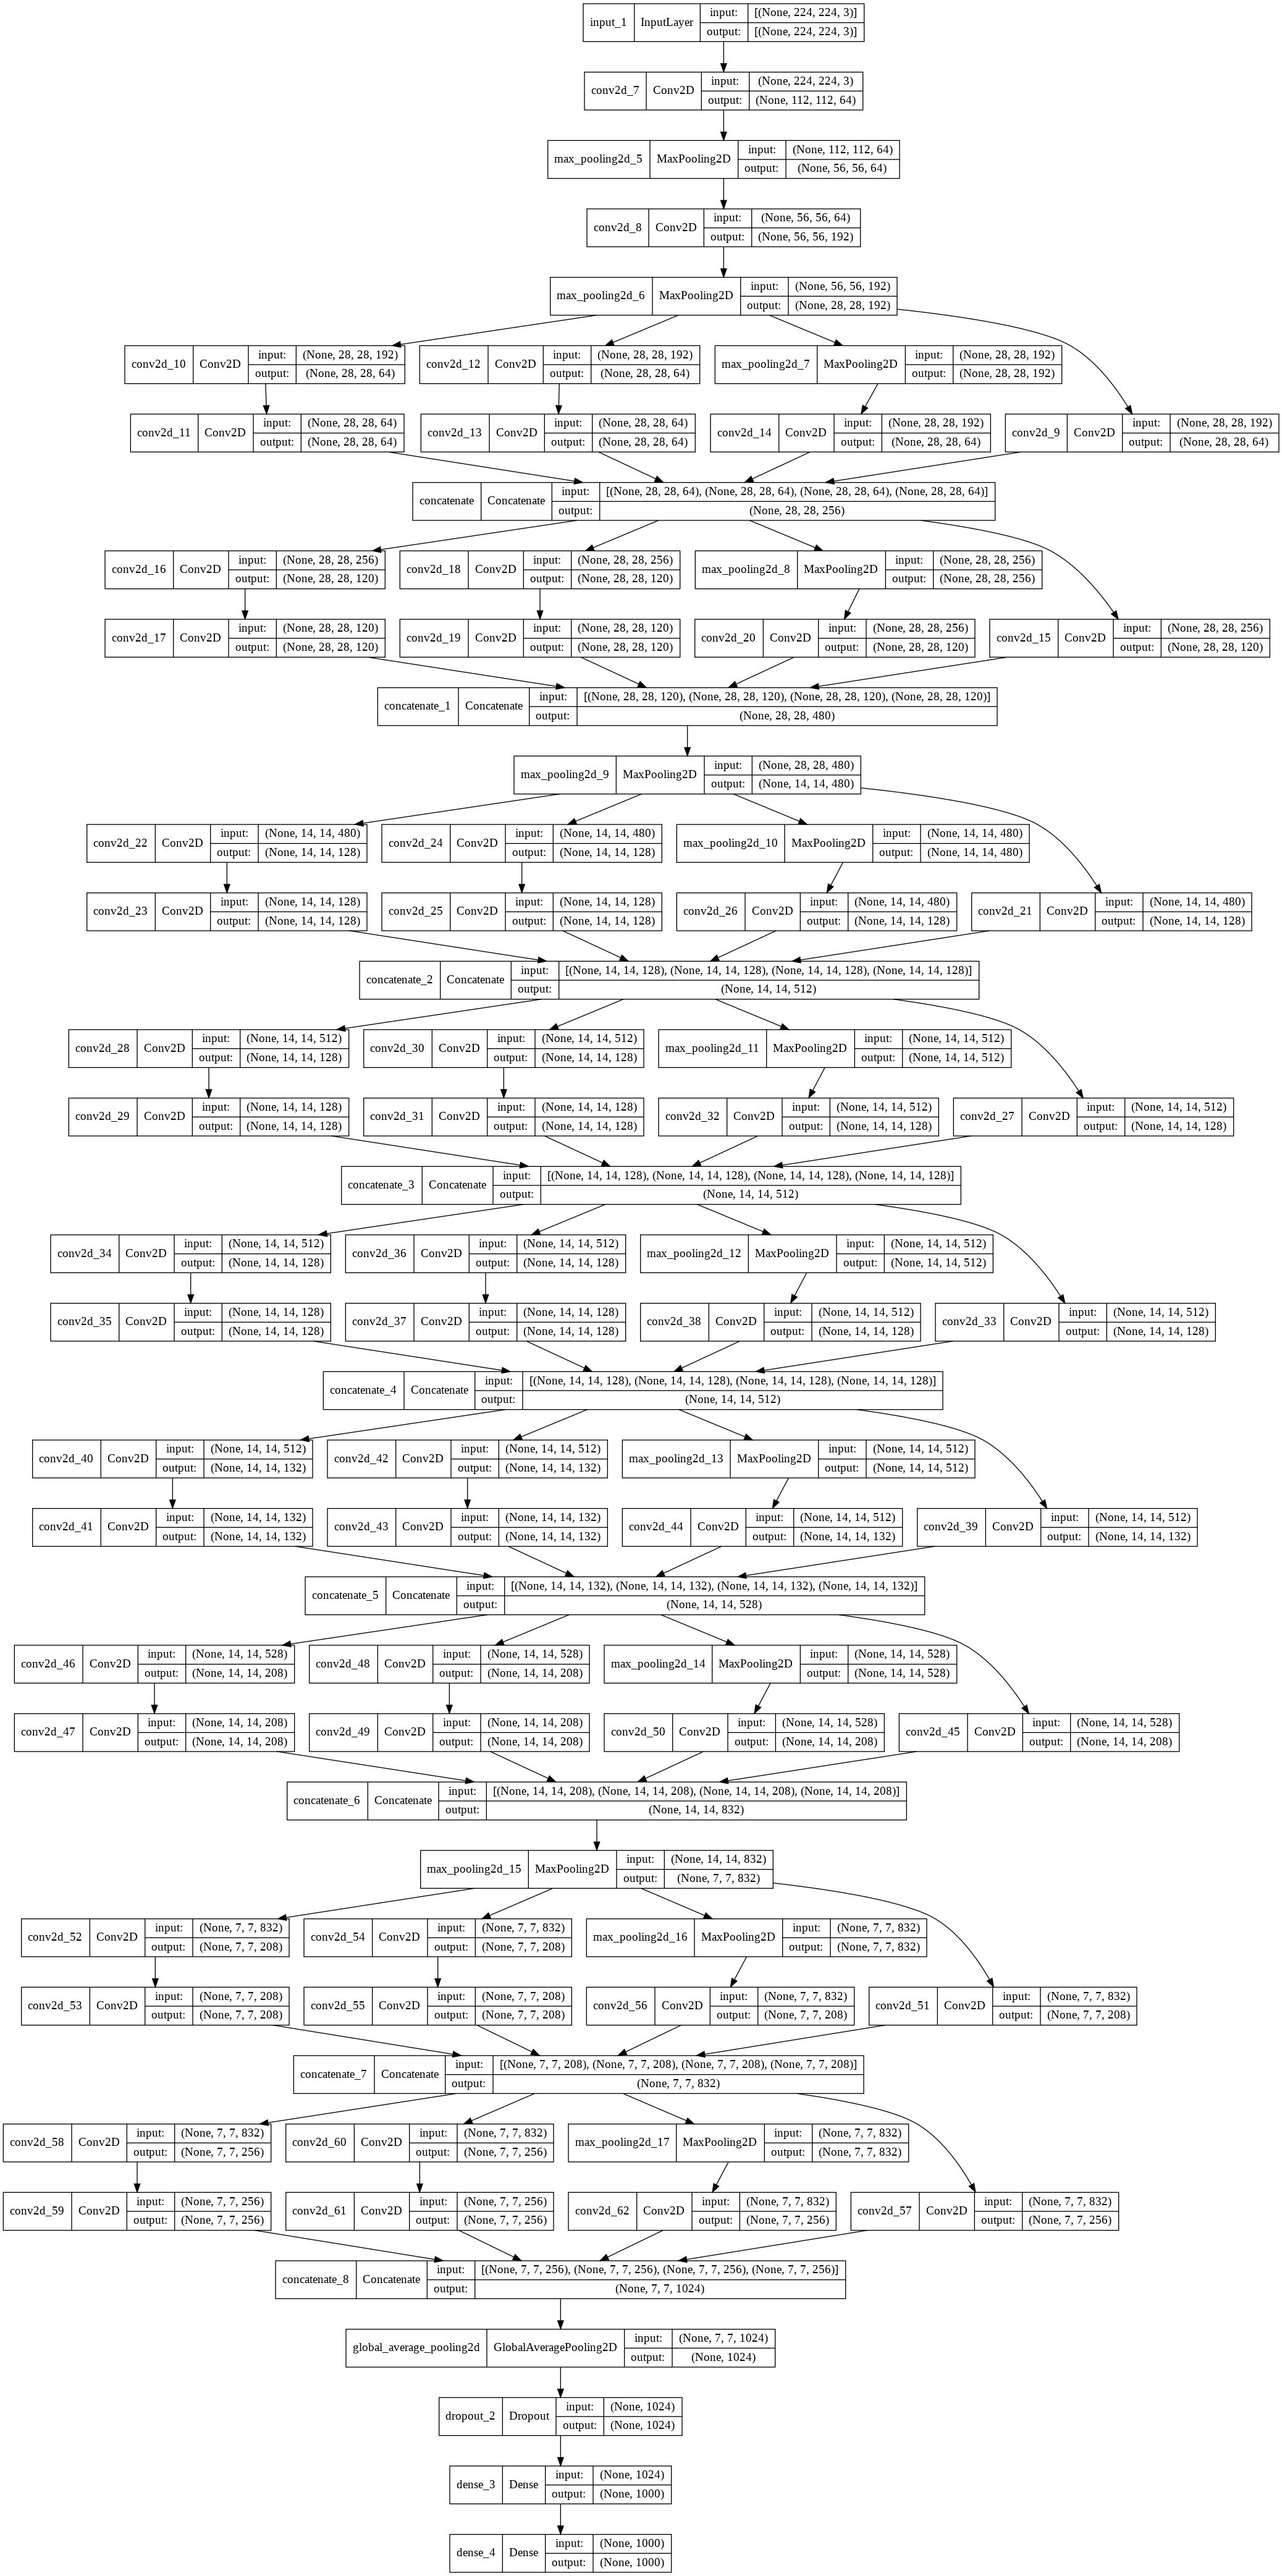

In [6]:
plot_model(model, show_shapes=True)

In [ ]:
# ResNet50
# https://github.com/keras-team/keras-applications/blob/master/keras_applications/resnet50.py
# https://github.com/raghakot/keras-resnet/blob/master/README.md
def identity_block(input_tensor, kernel_size, filters):
    """The identity block is the block that has no conv layer at shortcut.
    # Arguments
        input_tensor: input tensor
        kernel_size: default 3, the kernel size of
            middle conv layer at main path
        filters: list of integers, the filters of 3 conv layer at main path
    """
    filters1, filters2, filters3 = filters # ex: [64, 64, 256]
    bn_axis = -1

    x = Conv2D(filters1, (1, 1),
                      kernel_initializer='he_normal')(input_tensor)
    x = BatchNormalization(axis=bn_axis)(x)
    x = Activation('relu')(x)

    x = Conv2D(filters2, kernel_size,
                      padding='same',
                      kernel_initializer='he_normal')(x)
    x = BatchNormalization(axis=bn_axis)(x)
    x = Activation('relu')(x)

    x = Conv2D(filters3, (1, 1),
                      kernel_initializer='he_normal')(x)
    x = BatchNormalization(axis=bn_axis)(x)

    x = add([x, input_tensor]) # skip connection
    x = Activation('relu')(x)
    return x

def conv_block(input_tensor,
               kernel_size,
               filters,
               strides=(2, 2)):
    """A block that has a conv layer at shortcut.
    # Arguments
        input_tensor: input tensor
        kernel_size: default 3, the kernel size of
            middle conv layer at main path
        filters: list of integers, the filters of 3 conv layer at main path
        strides: Strides for the first conv layer in the block.
    """
    filters1, filters2, filters3 = filters
    bn_axis = -1

    x = Conv2D(filters1, (1, 1), strides=strides,
                      kernel_initializer='he_normal')(input_tensor)
    x = BatchNormalization(axis=bn_axis)(x)
    x = Activation('relu')(x)

    x = Conv2D(filters2, kernel_size, padding='same',
                      kernel_initializer='he_normal',)(x)
    x = BatchNormalization(axis=bn_axis)(x)
    x = Activation('relu')(x)

    x = Conv2D(filters3, (1, 1),
                      kernel_initializer='he_normal')(x)
    x = BatchNormalization(axis=bn_axis)(x)

    shortcut = Conv2D(filters3, (1, 1), strides=strides,
                             kernel_initializer='he_normal')(input_tensor)
    shortcut = BatchNormalization(axis=bn_axis)(shortcut)

    x = add([x, shortcut])
    x = Activation('relu')(x)
    return x

img_input = Input((224, 224, 3))
x = ZeroPadding2D(padding=(3, 3))(img_input)
x = Conv2D(64, (7, 7),
                    strides=(2, 2),
                    padding='valid',
                    kernel_initializer='he_normal')(x)
x = BatchNormalization(axis=-1)(x)
x = Activation('relu')(x)
x = ZeroPadding2D(padding=(1, 1))(x)
x = MaxPooling2D((3, 3), strides=(2, 2))(x)

x = conv_block(x, 3, [64, 64, 256], strides=(1, 1))
x = identity_block(x, 3, [64, 64, 256])
x = identity_block(x, 3, [64, 64, 256])

x = conv_block(x, 3, [128, 128, 512])
x = identity_block(x, 3, [128, 128, 512])
x = identity_block(x, 3, [128, 128, 512])
x = identity_block(x, 3, [128, 128, 512])

x = conv_block(x, 3, [256, 256, 1024])
x = identity_block(x, 3, [256, 256, 1024])
x = identity_block(x, 3, [256, 256, 1024])
x = identity_block(x, 3, [256, 256, 1024])
x = identity_block(x, 3, [256, 256, 1024])
x = identity_block(x, 3, [256, 256, 1024])

x = conv_block(x, 3, [512, 512, 2048])
x = identity_block(x, 3, [512, 512, 2048])
x = identity_block(x, 3, [512, 512, 2048])

x = GlobalAveragePooling2D(name='avg_pool')(x)
x = Dense(1000, activation='softmax', name='fc1000')(x)
model = Model(img_input, x)

In [ ]:
plot_model(model, show_shapes=True)

Load model from keras

In [ ]:
# model architecture only
model = tf.keras.applications.VGG16(include_top=True, 
                  weights=None, 
                  classes=10, 
                  input_shape=(224, 224, 3)) 
model.summary()

In [ ]:
# model architecture + pre-trained weights on ImageNet
model = tf.keras.applications.VGG16(include_top=True, 
                  weights='imagenet', 
                  classes=1000, 
                  input_shape=(224, 224, 3))
model.summary()